In [ ]:
import glob
import numpy as np
import pandas as pd
from modules import show_mod

In [ ]:
officeList = glob.glob("data/*")

for office in officeList:
    boxCountList = glob.glob(office + "/RiskOfInfection/*/BoxCount.csv")
    print(boxCountList)

In [ ]:
# a = np.loadtxt('data/office1/RiskOfInfection/0_0/BoxCount_A.csv', delimiter=',')

# boxCountFNAME = boxCountList[0]
boxCountFNAME = 'data/office1/RiskOfInfection/0_0/BoxCount.csv'
print(boxCountFNAME)
df = pd.read_csv(boxCountFNAME)

boxCountFNAME = 'data/office7/RiskOfInfection/960_246_bout/BoxCount.csv'
print(boxCountFNAME)
df_max = pd.read_csv(boxCountFNAME)

boxCountFNAME = 'data/office22/RiskOfInfection/360_82_bout/BoxCount.csv'
print(boxCountFNAME)
df_min = pd.read_csv(boxCountFNAME)

- 荒木雅弘先生へメールしたが，「専門外」とのこと
- 学内に機械学習の専門家は他におられない？

$$ 1 - \mathrm{exp} \left( - \frac{N}{N_0} I \right) $$

$$ N_0 = 900 \space \mathrm{[viral copy / h]} $$
$$ N = nv \space \mathrm{[viral copy / h]} $$
$$ n = 10^{-7} \space \mathrm{[viral copy / ml]} $$

$$ I_{original} = 1 $$

$$ I_\alpha = 1.32 $$
$$ I_\delta = 1.5 I_\alpha $$
$$ I_{BA1} = 4.2 I_\delta $$
$$ I_{BA2} = 1.26 I_{BA1} $$
$$ I_{BA5} = 1.27 I_{BA2} $$
$$ I_{BA2.75} = 3.24 I_{BA5} $$

<!-- $$ I_\delta = 2.5 $$
$$ I_\omicron = 2.5 \cdot 1.4 $$
$$ I_{BA.5} = 1.3 I_{BA.2} $$
$$ I_{BA.2} = ? $$ -->

[BA.5とBA.2の比について](https://www.covid19-ai.jp/ja-jp/presentation/2022_rq1_simulations_for_infection_situations/articles/article367/)

In [ ]:
I = 10.
def RateOfInfection(volume):
    """
    感染率計算
    飛沫シミュレーションは１分間しか行っていないので，１分間あたりに換算
    """
    ROI = 1. - np.exp( - volume * 1e7 / (900./60.) * I)
    return ROI

In [ ]:
r = RateOfInfection(df['volume'])
r

a = df['RoI'].to_numpy()
a = r.to_numpy()
print(a.shape)
b = a.reshape(55, 60)
print(b.shape)

ROI_original = df['RoI'].to_numpy().reshape(55, 60)

In [ ]:
#可視化用カラーマップの作成
# cmap = show_mod.make_colormap(["gray", "gray", "blue", "white", "red"])
cmap = show_mod.make_colormap(["blue", "white", "red"])


print('平均値：{:.2%}'.format(ROI_original.mean()))
#選んだ1個をプロット
show_mod.show_image(ROI_original, cbar=True, cmap=cmap, vmin=0)


print('平均値：{:.2%}'.format(b.mean()))
#選んだ1個をプロット
show_mod.show_image(b, cbar=True, cmap=cmap, vmin=0)

In [ ]:
ROI_max = df_max['RoI'].to_numpy().reshape(40, 90)
ROI_min = df_min['RoI'].to_numpy().reshape(65, 85)

In [ ]:
#可視化用カラーマップの作成
# cmap = show_mod.make_colormap(["gray", "gray", "blue", "white", "red"])
cmap = show_mod.make_colormap(["blue", "white", "red"])


print('平均値：{:.2%}'.format(ROI_max.mean()))
#選んだ1個をプロット
show_mod.show_image(ROI_max, cbar=True, cmap=cmap, vmin=0)


print('平均値：{:.2%}'.format(ROI_min.mean()))
#選んだ1個をプロット
show_mod.show_image(ROI_min, cbar=True, cmap=cmap, vmin=0)

In [ ]:
threshold_array = np.linspace(0., 0.9, 10)

for threshold in threshold_array:
    print("====================================")
    print(threshold)
    rate_min = np.count_nonzero(ROI_min > threshold) / ROI_min.size
    rate_max = np.count_nonzero(ROI_max > threshold) / ROI_max.size
    print(rate_min, rate_max)
    print((rate_max - rate_min)/(rate_max + rate_min))


In [ ]:
import pandas as pd

df_summary = pd.read_csv("/mnt/MachineLearning/data/summary_221015.csv")

df_summary

In [ ]:
df_summary[["aircon", "ventilation", "RoI"]].describe()

In [ ]:
df_summary["office"] = df_summary["casename"].map(lambda casename: casename.split("_")[0])

In [ ]:
df_summary

In [ ]:
import seaborn as sns

# sns.pairplot(df_summary[["aircon", "ventilation", "RoI", "office"]], hue='office', diag_kind="hist")
sns.pairplot(df_summary[["aircon", "ventilation", "RoI", "office"]], hue='office')

In [ ]:
df_floating = pd.read_csv("/mnt/MachineLearning/CountResults/floating_count_results/result_patientAverage.csv")

df_floating

In [ ]:
df_total = pd.merge(df_summary, df_floating, on="casename")
df_total

In [ ]:
df_total["office"] = df_total["casename"].map(lambda casename: casename.split("_")[0])

In [ ]:
df_total

In [ ]:
import seaborn as sns

sns.pairplot(df_total, hue='office', diag_kind="hist")

### 時間平均
観測ボックスカウントの時系列データの総和に対してデータ長さで割る（時間平均）

In [ ]:
!pwd

In [ ]:
import pandas as pd


df = pd.read_csv("/mnt/MachineLearning/Count_timeSeries/standing/count_sum.csv", header=None)
df

In [ ]:
df["timeMean"] = df[[1]] / 601.

In [ ]:
df.set_axis(["case_name", "count_sum", "count_timeMean"], axis='columns', inplace=True)

In [ ]:
df.to_csv("/mnt/MachineLearning/Count_timeSeries/standing/count_summary.csv", index=False)

In [ ]:
df_summary = pd.read_csv("/mnt/MachineLearning/CountResults/summary_221015.csv")
df_summary

In [ ]:
df_summary.rename(columns={"casename":"case_name"}, inplace=True)

In [ ]:
df_total = pd.merge(df_summary, df, on="case_name")
df_total

In [ ]:
df_total["office"] = df_total["case_name"].map(lambda casename: casename.split("_")[0])
df_total

In [ ]:
df_total.rename(columns={"num_drop":"n_from2sec", "n_s_from2sec":"n_from2sec/S"}, inplace=True)
df_total

In [ ]:
df_core = df_total.reindex(columns=['case_name', "office", 'aircon', 'ventilation', "exhaust", "n_from2sec", "n_from2sec/S", "count_timeMean", "fromSittingToStanding"])
df_core

In [ ]:
# Save

df_core.to_csv("/mnt/MachineLearning/data/summary_20221216.csv", index=False)

In [ ]:
df_core = df_core.rename(columns={"count_timeMean":"countTimeMean_sit", "fromSittingToStanding":"countTimeMean_sit2stand"})
df_core

In [ ]:
import seaborn as sns

sns.pairplot(df_core[["aircon", "ventilation", "exhaust", "n_from2sec/S", "countTimeMean_sit", "countTimeMean_sit2stand",  "office"]], hue='office')#, diag_kind="hist")

In [ ]:
df_core.describe()

In [ ]:
df_total

In [ ]:
df = pd.read_csv("/mnt/MachineLearning/Count_timeSeries/fromSittingToStanding/patientMean/summary.csv")
df.mean()

In [ ]:
s_mean = df.mean()
df_mean = pd.DataFrame({"fromSittingToStanding":s_mean})
df_mean

In [ ]:
df = df_mean.reset_index()
df.rename(columns={'index': 'case_name'}, inplace=True)
df

In [ ]:
df_total = pd.merge(df_total,df, on="case_name")
df_total

In [ ]:
df_total = df_total.drop(columns="level_0")
df_total

In [524]:
import matplotlib
list(matplotlib.colors.cnames.keys())

['aliceblue',
 'antiquewhite',
 'aqua',
 'aquamarine',
 'azure',
 'beige',
 'bisque',
 'black',
 'blanchedalmond',
 'blue',
 'blueviolet',
 'brown',
 'burlywood',
 'cadetblue',
 'chartreuse',
 'chocolate',
 'coral',
 'cornflowerblue',
 'cornsilk',
 'crimson',
 'cyan',
 'darkblue',
 'darkcyan',
 'darkgoldenrod',
 'darkgray',
 'darkgreen',
 'darkgrey',
 'darkkhaki',
 'darkmagenta',
 'darkolivegreen',
 'darkorange',
 'darkorchid',
 'darkred',
 'darksalmon',
 'darkseagreen',
 'darkslateblue',
 'darkslategray',
 'darkslategrey',
 'darkturquoise',
 'darkviolet',
 'deeppink',
 'deepskyblue',
 'dimgray',
 'dimgrey',
 'dodgerblue',
 'firebrick',
 'floralwhite',
 'forestgreen',
 'fuchsia',
 'gainsboro',
 'ghostwhite',
 'gold',
 'goldenrod',
 'gray',
 'green',
 'greenyellow',
 'grey',
 'honeydew',
 'hotpink',
 'indianred',
 'indigo',
 'ivory',
 'khaki',
 'lavender',
 'lavenderblush',
 'lawngreen',
 'lemonchiffon',
 'lightblue',
 'lightcoral',
 'lightcyan',
 'lightgoldenrodyellow',
 'lightgray',
 

In [546]:
import matplotlib.pyplot as plt

def data_plot_overCases(df:pd.DataFrame, target_col:str, x_lim=None, y_lim=None):
    plt.figure(figsize=[12, 8])

    #カラーマップ等の準備
    markers = ("s", "x", "o", "^", "v", "<", ">", "1", "2", "3", "4", "8")
    colors = list(matplotlib.colors.cnames.keys())
    start_index = 0

    for idx, target_office_name in enumerate(df['office'].unique()):
        datas = df[df['office'] == target_office_name][target_col]

        end_index = len(datas)+start_index
        # print(start_index, end_index)
        plt.scatter(datas, range(start_index, end_index), 
                    s=80, c=colors[idx], marker=markers[2], edgecolor="white", label=target_office_name)
        start_index = end_index

    if x_lim is not None:
        plt.xlim(x_lim)
    if y_lim is not None:
        plt.ylim(y_lim)
        
    plt.ylabel("case index")
    plt.xlabel(target_col)
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid()
    plt.show()

# 2022/12/19

In [ ]:
df_summary = pd.read_csv("/mnt/MachineLearning/data/summary_20221216.csv")
df_summary

In [ ]:
df_eVar = pd.read_csv("/mnt/MachineLearning/data/ExplanatoryVariables.csv")
df_eVar

In [ ]:
df_total = pd.merge(df_summary,df_eVar, on=["case_name", 'aircon', 'ventilation', 'exhaust'])

In [ ]:
df_total.columns

In [ ]:
df_core = df_total[[
        "aircon",
        "ventilation",
        "exhaust",
        "n_from2sec/S",
        "countTimeMean_sit",
        "countTimeMean_sit2stand",
        "office_size_x",
        "office_size_y",
        "office"
    ]]

In [ ]:
import seaborn as sns

sns.pairplot(df_core, hue='office')#, diag_kind="hist")

In [ ]:
df_core_corr = df_core.corr()
df_core_corr

In [ ]:
sns.heatmap(df_core_corr, vmax=1, vmin=-1, center=0)

# 22/12/20

In [ ]:
df_eVar = pd.read_csv("/mnt/MachineLearning/data/ExplanatoryVariables.csv")
df_eVar

In [ ]:
shape_dict = {
    "6, 5.5": ["office1", "office2", "office3", "office4", "office5", "office6", ],
    "9, 4": ["office7", "office8", "office9", ], 
    "7, 6": ["office10", "office11", "office12", "office13", "office14", "office15", ], 
    "9, 5": ["office16", "office17", "office18", "office19", "office20", "office21", ], 
    "8.5, 6.5": ["office22", "office23", "office24", "office25", "office26", "office27", ], 
    "9.5, 6": ["office28", "office29", "office30", "office31", "office32", "office33",], 
}

In [ ]:
df_shape = df_eVar[["office_size_x", "office_size_y"]].drop_duplicates()
df_shape.

In [ ]:
df_shape.set_axis(['6, 5.5', '7, 6', '9, 5', '8.5, 6.5', '9.5, 6', '9, 4'], axis='index', inplace=True)

In [ ]:
df_shape

In [ ]:
df_shape.reset_index(inplace=True)
df_shape

In [ ]:
df_shape.rename({'index':'office_type'}, axis='columns', inplace=True)
df_shape

In [ ]:
df_new = pd.merge(df_eVar, df_shape, on=["office_size_x", "office_size_y"])
df_new

In [ ]:
df_new.info()

In [ ]:
df_new.to_csv("/mnt/MachineLearning/data/ExplanatoryVariables_20221220.csv", index=False)

In [ ]:
df_read = pd.read_csv("/mnt/MachineLearning/data/summary_20221216.csv")
df_read

In [ ]:
df_total = pd.merge(df_new, df_read, on=["case_name", "aircon", "ventilation", "exhaust"])
df_total

In [ ]:
df_core = df_total[["aircon", "ventilation", "exhaust", "office", "office_type", "countTimeMean_sit2stand"]]
df_core

In [ ]:
df_onehot = pd.get_dummies(df_core, columns=['office'])
df_onehot

In [ ]:
df_corr = df_onehot.drop(columns=["aircon", "ventilation"]).corr()
df_corr["countTimeMean_sit2stand"]

In [ ]:
sns.heatmap(df_corr, vmax=1, vmin=-1, center=0)

In [ ]:
df_onehot = pd.get_dummies(df_core, columns=['office_type'])
df_onehot

In [ ]:
df_corr = df_onehot.drop(columns=["aircon", "ventilation"]).corr()
df_corr["countTimeMean_sit2stand"]

In [ ]:
sns.heatmap(df_corr, vmax=1, vmin=-1, center=0)

In [ ]:
df_onehot = pd.get_dummies(df_core, columns=['exhaust'])
df_onehot

In [ ]:
df_corr = df_onehot[["countTimeMean_sit2stand", "aircon", "ventilation", "exhaust_a", "exhaust_b", "exhaust_off"]].corr()
df_corr["countTimeMean_sit2stand"]

In [ ]:
sns.heatmap(df_corr, vmax=1, vmin=-1, center=0)

In [ ]:
import sys
sys.path.append('/mnt/MachineLearning/modules')

In [ ]:
import os

officemodel_path = '/mnt/MachineLearning/Office3DModel/model_origin'
case_list = os.listdir(officemodel_path)
case_list

In [ ]:
import glob

dir_list = glob.glob('/mnt/MachineLearning/Office3DModel/model_origin/*')
dir_list

In [ ]:
desks_file_list = []
for dir_name in dir_list:
    desks_file_list.append(glob.glob(dir_name+'/desks/*')[0])
    
desks_file_list

In [ ]:
import stl

df_desks = pd.DataFrame()

for desks_fname in desks_file_list:
    
    office_name = desks_fname.split("/")[5]
    df_desks = pd.DataFrame()
    
    mesh_list = stl.mesh.Mesh.from_multi_file(desks_fname)
    index = 0
    for mesh in mesh_list:
        points = mesh.points.reshape([-1, 3])

        if points[:,2].max() == 0.75:
            # desk
            df = pd.DataFrame(
                {
                    "x_min": points[:,0].min(),
                    "x_max": points[:,0].max(),
                    "y_min": points[:,1].min(),
                    "y_max": points[:,1].max()
                }, 
                index=[f'desk-{index}']
            )
            
            df_desks = pd.concat([df_desks, df])
            
            index += 1
            
    print(office_name, df_desks.shape)
    df_desks.to_csv(f"/mnt/MachineLearning/Office3DModel/shape/desks_info/{office_name}.csv")
        

In [ ]:
df_desks.to_csv("/mnt/MachineLearning/Office3DModel/shape/desks_info.csv")

In [ ]:
from matplotlib import pyplot as plt

def plot3d_points(point_cloud):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(projection="3d")
    ax.scatter(point_cloud[:, 0], point_cloud[:, 1], point_cloud[:, 2], alpha=0.4, s=2)
    # ax.set_axis_off()
    
    # 表示範囲の設定
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    # ax.set_zlim(0, 10)
    plt.show()
    

In [ ]:
import pointCloud_operator as pco
from stl import mesh
import glob
import numpy as np

officename = "office12"

path = officemodel_path + '/' + officename + '/' + pco.OfficePart.desks.name
# print(path)
stl_list = glob.glob(path + "/*.stl")
print(stl_list)
pc_list = []
for stlfname in stl_list:
    for index, mesh_read in enumerate(mesh.Mesh.from_multi_file(stlfname)):
        points = mesh_read.points.reshape([-1, 3])
        print(index, points.shape, points[:, 2].max())
        plot3d_points(points)
        pc_list.append(points)

# points_concat = np.concatenate(pc_list)
# points_concat = np.unique(points_concat, axis=0)
# pc_dict[part] = points_concat.copy()


In [ ]:
pc_dict

# 時間平均データの追加
- 机の上を除去
- 浮遊飛沫のみ

In [424]:
# df = pd.read_csv("/mnt/MachineLearning/Count_timeSeries/exceptDesk/patientMean/summary.csv")
df = pd.read_csv("/mnt/MachineLearning/Count_timeSeries/onlyFloating/patientMean/summary.csv")
df

,office10_0_0,office10_0_164_aout,office10_0_164_bout,office10_0_246_aout,office10_0_246_bout,office10_0_82_aout,office10_0_82_bout,office10_360_0,office10_360_164_aout,office10_360_164_bout,...,office9_660_246_bout,office9_660_82_aout,office9_660_82_bout,office9_960_0,office9_960_164_aout,office9_960_164_bout,office9_960_246_aout,office9_960_246_bout,office9_960_82_aout,office9_960_82_bout
0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
1,9254.0,9233.0,9159.4,9140.4,8865.8,9315.0,9198.0,9114.0,8888.8,8663.4,...,9521.0,9604.4,9693.4,9380.4,9572.4,9546.8,9661.6,9428.4,9444.4,9650.8
2,8672.6,8700.0,8698.8,8619.2,8531.6,8571.4,8752.8,8545.2,8290.0,8359.2,...,8664.6,8880.0,8911.2,8435.6,8619.0,8532.8,8781.8,8687.4,8915.4,8740.0
3,8312.0,7960.6,8127.0,8084.6,8111.0,8292.2,7419.6,7973.0,7696.2,7506.6,...,8154.8,8274.6,8414.6,8093.2,7989.2,8094.4,8367.2,8223.2,8589.4,7832.0
4,8237.4,7954.2,7867.2,7842.4,7701.4,8033.8,7457.0,7394.2,7650.2,6945.6,...,7616.2,7431.8,7610.6,7669.8,7651.4,7555.8,8024.6,7917.8,8250.0,7204.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,1031.0,1527.8,1213.2,1166.6,1649.2,1289.4,1009.8,375.4,424.4,898.2,...,807.6,370.2,547.6,1107.2,711.0,854.4,918.2,959.8,978.8,804.4
597,1029.6,1530.2,1217.2,1170.4,1649.0,1289.8,997.8,374.8,422.4,896.6,...,805.8,366.8,544.2,1106.0,711.8,854.6,921.6,957.4,977.6,801.2
598,1027.8,1530.6,1221.2,1171.0,1646.8,1289.4,991.8,377.2,422.8,897.4,...,806.4,365.8,542.8,1101.6,712.8,851.0,918.4,961.6,975.0,799.0
599,1026.8,1515.0,1222.8,1173.6,1643.4,1293.0,993.2,383.2,421.4,895.6,...,807.6,363.8,544.2,1099.8,709.2,853.0,920.6,962.4,973.2,798.2


<AxesSubplot:>

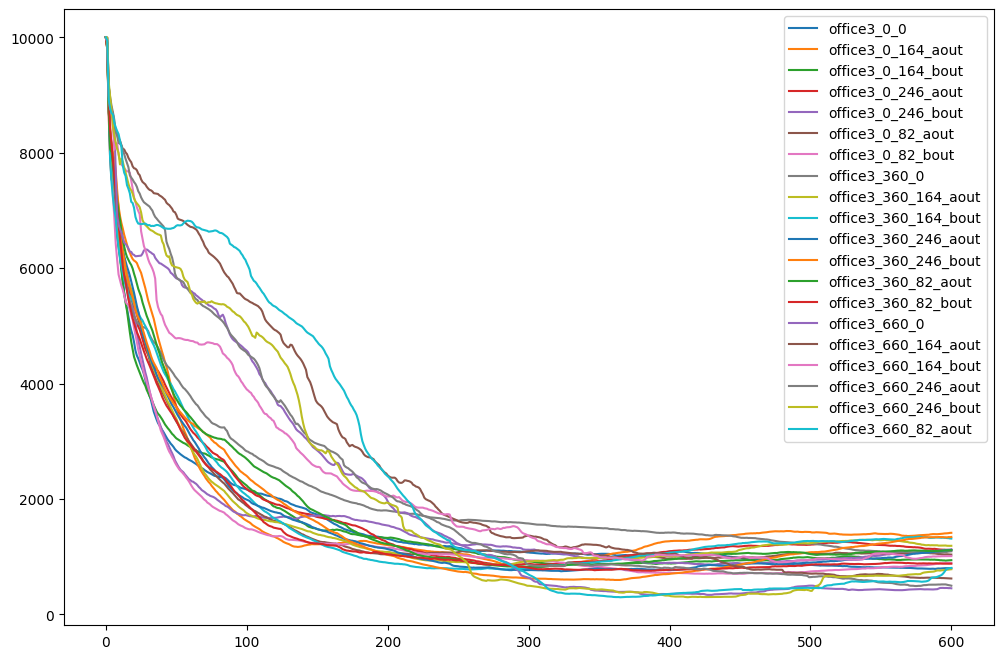

In [425]:
df_filtered = df.filter(like="office3_")
df_filtered.iloc[:,:20].plot(figsize=(12,8))

In [426]:
# s_mean = df.mean()
# s_mean.rename("countTimeMean_exceptDesk", inplace=True)

In [428]:
s_mean = df.iloc[1:].mean()
s_mean.rename("countTimeMean_onlyFloating", inplace=True)

office10_0_0            2218.209333
office10_0_164_aout     2876.143667
office10_0_164_bout     2242.652000
office10_0_246_aout     2730.879667
office10_0_246_bout     3152.484000
                           ...     
office9_960_164_bout    1747.424000
office9_960_246_aout    2076.052000
office9_960_246_bout    2151.431000
office9_960_82_aout     1942.626667
office9_960_82_bout     2076.373000
Name: countTimeMean_onlyFloating, Length: 431, dtype: float64

In [429]:
df_summary = pd.read_csv("/mnt/MachineLearning/data/summary_20230105.csv")
df_summary.set_index("case_name", inplace=True)
df_summary

,office,aircon,ventilation,exhaust,n_from2sec,n_from2sec/S,countTimeMean_sit,countTimeMean_sit2stand,countTimeMean_exceptDesk
case_name,,,,,,,,,
office1_0_0,office1,0.0,0.0,off,7337.2,222.339394,402.713478,3034.173710,2391.085333
office1_0_123_aout,office1,0.0,123.0,a,7207.2,218.400000,530.467554,2686.293844,2246.749000
office1_0_123_bout,office1,0.0,123.0,b,6642.8,201.296970,677.838270,2981.851913,2496.447333
office1_0_164_aout,office1,0.0,164.0,a,7249.8,219.690909,410.265557,2503.411647,2013.792333
office1_0_164_bout,office1,0.0,164.0,b,7328.0,222.060606,582.445923,3309.428286,2912.489667
...,...,...,...,...,...,...,...,...,...
office28_960_164_bout,office28,960.0,164.0,b,6914.2,121.301754,381.545424,1707.855241,1240.251000
office28_960_246_aout,office28,960.0,246.0,a,6621.2,116.161404,150.166389,1221.390017,783.102333
office28_960_246_bout,office28,960.0,246.0,b,8008.6,140.501754,306.184692,1870.094842,1241.705667


In [430]:
df_summary = df_summary.join(s_mean)
df_summary

,office,aircon,ventilation,exhaust,n_from2sec,n_from2sec/S,countTimeMean_sit,countTimeMean_sit2stand,countTimeMean_exceptDesk,countTimeMean_onlyFloating
case_name,,,,,,,,,,
office1_0_0,office1,0.0,0.0,off,7337.2,222.339394,402.713478,3034.173710,2391.085333,2991.405667
office1_0_123_aout,office1,0.0,123.0,a,7207.2,218.400000,530.467554,2686.293844,2246.749000,2656.982333
office1_0_123_bout,office1,0.0,123.0,b,6642.8,201.296970,677.838270,2981.851913,2496.447333,2951.144667
office1_0_164_aout,office1,0.0,164.0,a,7249.8,219.690909,410.265557,2503.411647,2013.792333,2470.395667
office1_0_164_bout,office1,0.0,164.0,b,7328.0,222.060606,582.445923,3309.428286,2912.489667,3271.053000
...,...,...,...,...,...,...,...,...,...,...
office28_960_164_bout,office28,960.0,164.0,b,6914.2,121.301754,381.545424,1707.855241,1240.251000,1673.857667
office28_960_246_aout,office28,960.0,246.0,a,6621.2,116.161404,150.166389,1221.390017,783.102333,1177.425667
office28_960_246_bout,office28,960.0,246.0,b,8008.6,140.501754,306.184692,1870.094842,1241.705667,1829.939000


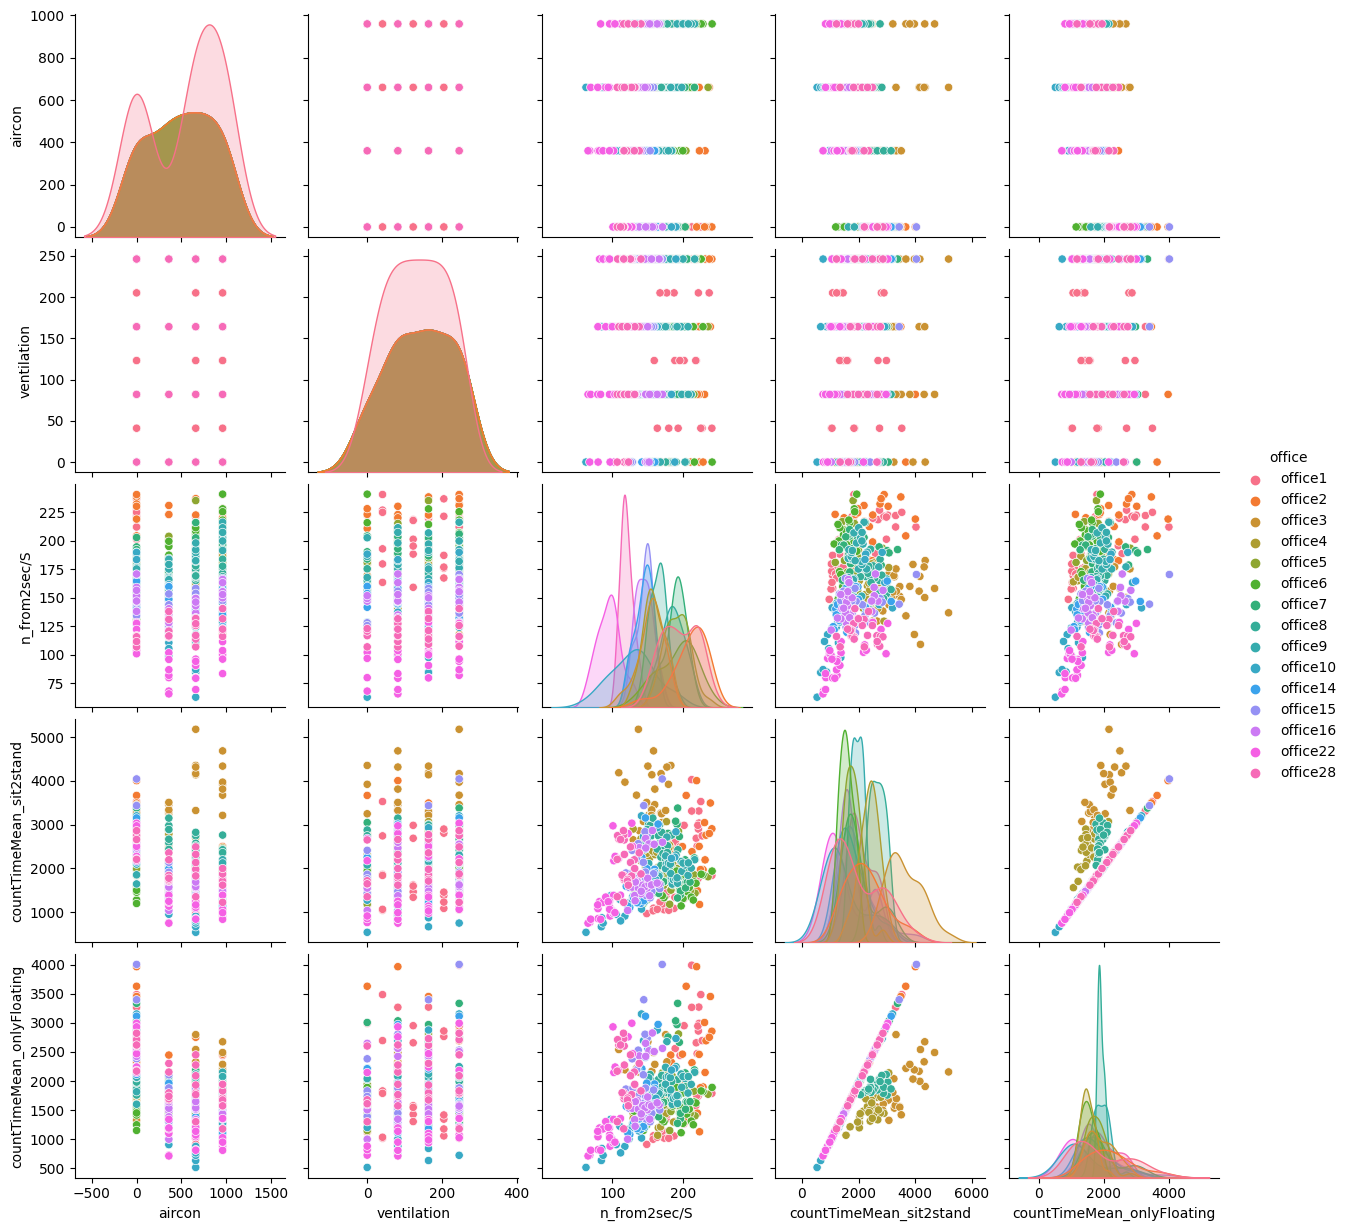

In [432]:
import seaborn as sns

sns.pairplot(df_summary[["aircon", "ventilation", "n_from2sec/S", "countTimeMean_sit2stand", "countTimeMean_onlyFloating",  "office"]], hue='office')#, diag_kind="hist")

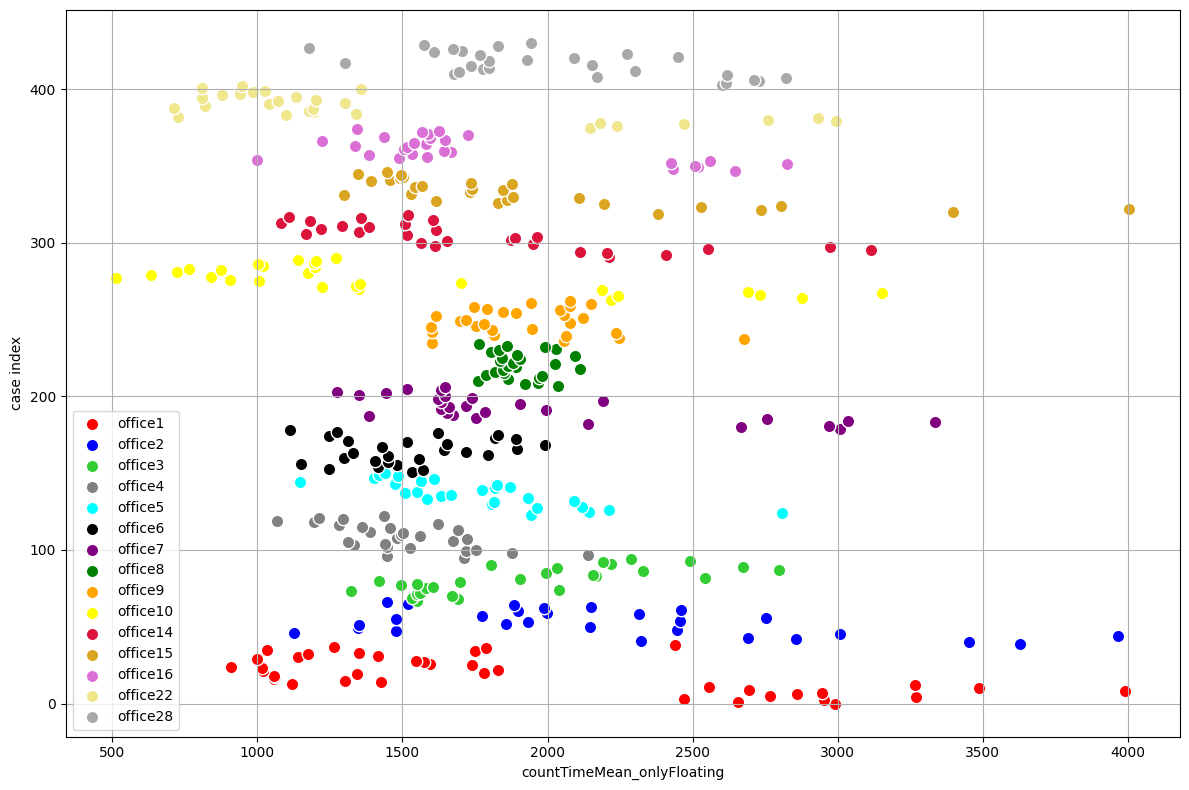

In [436]:
data_plot_overCases(df_summary, "countTimeMean_onlyFloating", x_lim=None)

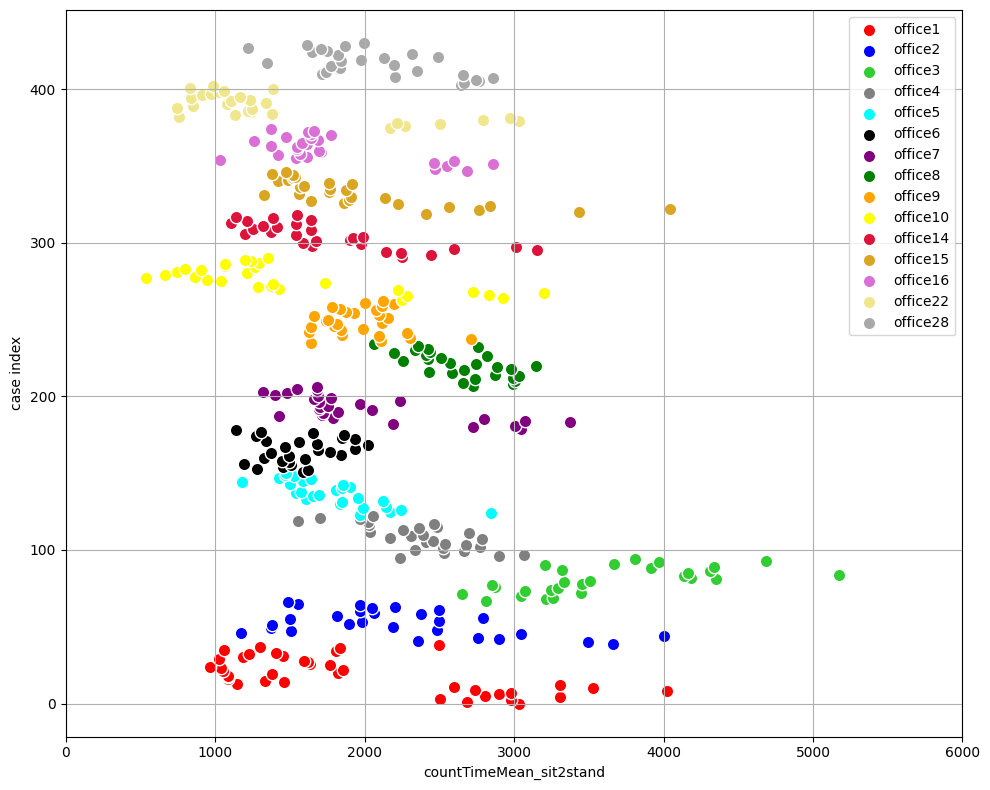

In [399]:
data_plot_overCases(df_summary, "countTimeMean_sit2stand", x_lim=(0,6000))

In [437]:
df_corr = df_summary[["aircon", "ventilation", "n_from2sec/S", "countTimeMean_sit2stand", "countTimeMean_onlyFloating"]].corr()
df_corr

,aircon,ventilation,n_from2sec/S,countTimeMean_sit2stand,countTimeMean_onlyFloating
aircon,1.000000,-0.000993,0.067739,-0.414872,-0.522779
ventilation,-0.000993,1.000000,0.026149,0.053493,0.065928
n_from2sec/S,0.067739,0.026149,1.000000,0.225968,0.347261
countTimeMean_sit2stand,-0.414872,0.053493,0.225968,1.000000,0.768353
countTimeMean_onlyFloating,-0.522779,0.065928,0.347261,0.768353,1.000000


<AxesSubplot:>

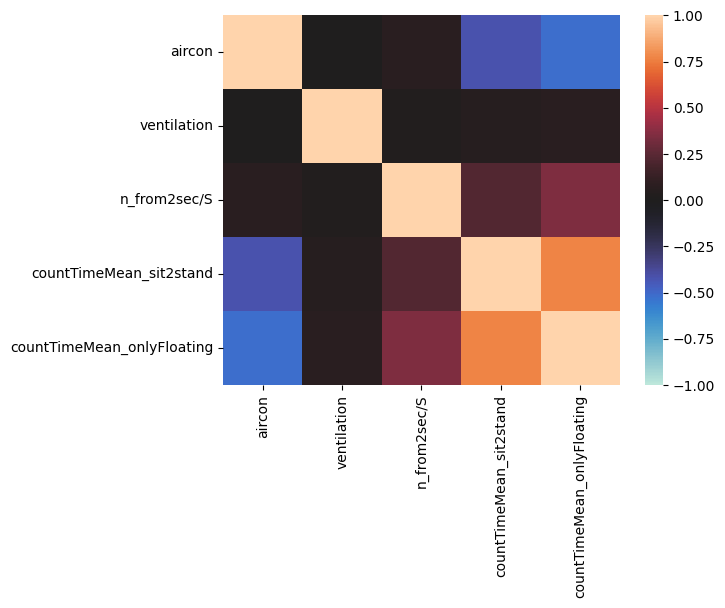

In [438]:
sns.heatmap(df_corr, vmax=1, vmin=-1, center=0)

In [392]:
# df_summary.reset_index(inplace=True)

In [496]:
# Sort DataFrame

# df_summary['order'] = df_summary['office'].apply(
#     lambda office: office_sorted_list.index(office) if office in office_sorted_list else -1)

# df_summary = df_summary.sort_values(['order', 'case_name']).drop(columns="order")

In [486]:
df_total = df_summary

# ４分位数でビニング
# df_total["countTimeMean_bin"] = pd.qcut(df_summary["countTimeMean_onlyFloating"], 4, labels=False)
# df_total["countTimeMean_bin"] = pd.qcut(df_summary["countTimeMean_sit2stand"], 4, labels=False)

# 最大最小区間を等間隔にビニング
df_total["countTimeMean_bin"] = pd.cut(df_summary["countTimeMean_onlyFloating"], 4, labels=False)

df_total

,case_name,office,aircon,ventilation,exhaust,n_from2sec,n_from2sec/S,countTimeMean_sit,countTimeMean_sit2stand,countTimeMean_exceptDesk,countTimeMean_onlyFloating,countTimeMean_bin
0,office1_0_0,office1,0.0,0.0,off,7337.2,222.339394,402.713478,3034.173710,2391.085333,2991.405667,2
1,office1_0_123_aout,office1,0.0,123.0,a,7207.2,218.400000,530.467554,2686.293844,2246.749000,2656.982333,2
2,office1_0_123_bout,office1,0.0,123.0,b,6642.8,201.296970,677.838270,2981.851913,2496.447333,2951.144667,2
3,office1_0_164_aout,office1,0.0,164.0,a,7249.8,219.690909,410.265557,2503.411647,2013.792333,2470.395667,2
4,office1_0_164_bout,office1,0.0,164.0,b,7328.0,222.060606,582.445923,3309.428286,2912.489667,3271.053000,3
...,...,...,...,...,...,...,...,...,...,...,...,...
426,office28_960_164_bout,office28,960.0,164.0,b,6914.2,121.301754,381.545424,1707.855241,1240.251000,1673.857667,1
427,office28_960_246_aout,office28,960.0,246.0,a,6621.2,116.161404,150.166389,1221.390017,783.102333,1177.425667,0
428,office28_960_246_bout,office28,960.0,246.0,b,8008.6,140.501754,306.184692,1870.094842,1241.705667,1829.939000,1
429,office28_960_82_aout,office28,960.0,82.0,a,6985.2,122.547368,260.739434,1614.279867,1111.215667,1573.189000,1


In [563]:
def plot_RoI_level(df_total:pd.DataFrame):
    #オフィスごとのRoI_levelをカウントしてみる
    unique_office = df_total["office"].unique()
    classification_level = df_total["countTimeMean_bin"].nunique()
    num_RoI_level = np.zeros((len(unique_office), classification_level))#ラベルのカウント数を保存するリスト

    #各オフィスにアクセスするループ
    count = 0#ループの回数をカウントする
    for selected_office in unique_office:
        df_selected_office = df_total[df_total["office"]==selected_office]
        #各ラベルの個数カウント
        for i in range(classification_level):
            num_RoI_level[count, i] = (df_selected_office['countTimeMean_bin'] == i).sum()

        count += 1


    #グラフの描画
    colors = ("steelblue", "limegreen", "gold","orange","crimson")
    plt.figure(figsize=[12, 8]) 
    virtical = num_RoI_level#縦軸の値
    horizontal = np.arange(unique_office.shape[0])#横軸の値
    officeID_list = [officename.replace("office", "") for officename in unique_office]
    for level in range(classification_level):
        plt.bar(x=horizontal, height=virtical[:, level], tick_label=officeID_list, bottom=virtical[:, :level].sum(axis=1), color=colors[level])

    plt.ylabel("count")
    plt.xlabel("office ID")
    plt.legend(np.arange(classification_level), loc="best")
    plt.tight_layout()
    plt.grid()
    plt.show()

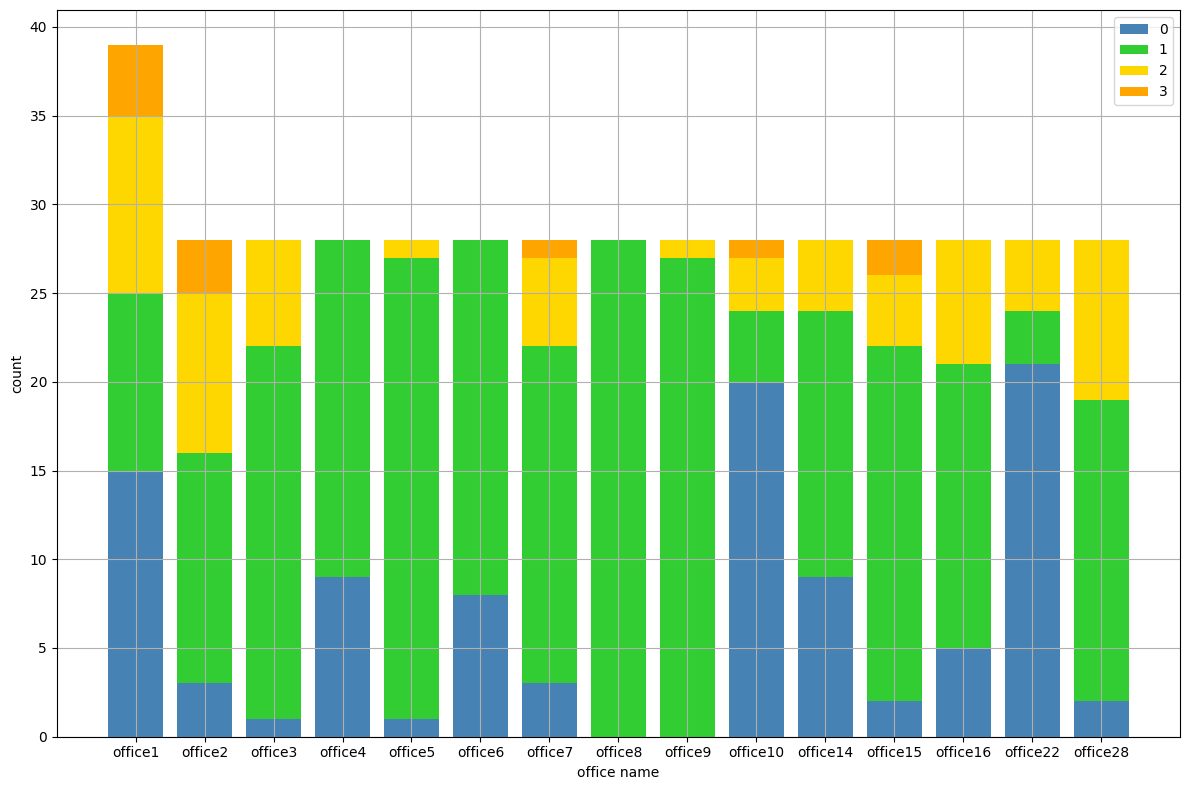

In [488]:
plot_RoI_level(df_total)

In [485]:
df_total.describe()

,aircon,ventilation,n_from2sec,n_from2sec/S,countTimeMean_sit,countTimeMean_sit2stand,countTimeMean_exceptDesk,countTimeMean_onlyFloating,countTimeMean_bin
count,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000
mean,499.071926,139.837587,6130.170302,161.902247,382.960333,2045.895491,1416.518913,1799.942903,1.498840
std,360.876287,83.985694,921.844114,36.376848,219.342164,758.168789,586.866477,578.024143,1.120371
min,0.000000,0.000000,2644.400000,62.961905,77.504160,536.517804,342.574667,513.951333,0.000000
25%,0.000000,82.000000,5540.500000,138.530952,237.477704,1508.278536,1064.291333,1432.947333,0.500000
50%,660.000000,164.000000,6169.400000,159.866667,344.316805,1858.661564,1276.037333,1719.817000,1.000000
75%,960.000000,246.000000,6791.400000,188.787879,475.919135,2519.456240,1640.265167,2077.219000,2.500000
max,960.000000,246.000000,8008.600000,240.763636,1814.896506,5176.822962,4230.648000,4004.831000,3.000000


In [ ]:
df_summary = df_summary.drop(columns="countTimeMean_bin")

In [447]:
df_summary.reset_index(inplace=True)

In [448]:
df_summary.to_csv("/mnt/MachineLearning/data/summary_20230107.csv", index=False)

In [449]:
df_summary

,case_name,office,aircon,ventilation,exhaust,n_from2sec,n_from2sec/S,countTimeMean_sit,countTimeMean_sit2stand,countTimeMean_exceptDesk,countTimeMean_onlyFloating
0,office1_0_0,office1,0.0,0.0,off,7337.2,222.339394,402.713478,3034.173710,2391.085333,2991.405667
1,office1_0_123_aout,office1,0.0,123.0,a,7207.2,218.400000,530.467554,2686.293844,2246.749000,2656.982333
2,office1_0_123_bout,office1,0.0,123.0,b,6642.8,201.296970,677.838270,2981.851913,2496.447333,2951.144667
3,office1_0_164_aout,office1,0.0,164.0,a,7249.8,219.690909,410.265557,2503.411647,2013.792333,2470.395667
4,office1_0_164_bout,office1,0.0,164.0,b,7328.0,222.060606,582.445923,3309.428286,2912.489667,3271.053000
...,...,...,...,...,...,...,...,...,...,...,...
426,office28_960_164_bout,office28,960.0,164.0,b,6914.2,121.301754,381.545424,1707.855241,1240.251000,1673.857667
427,office28_960_246_aout,office28,960.0,246.0,a,6621.2,116.161404,150.166389,1221.390017,783.102333,1177.425667
428,office28_960_246_bout,office28,960.0,246.0,b,8008.6,140.501754,306.184692,1870.094842,1241.705667,1829.939000
429,office28_960_82_aout,office28,960.0,82.0,a,6985.2,122.547368,260.739434,1614.279867,1111.215667,1573.189000


In [451]:
maxID = df_summary['countTimeMean_onlyFloating'].argmax()
df_summary.iloc[maxID]

case_name                     office15_0_246_aout
office                                   office15
aircon                                        0.0
ventilation                                 246.0
exhaust                                         a
n_from2sec                                 7157.6
n_from2sec/S                           170.419048
countTimeMean_sit                      770.148752
countTimeMean_sit2stand                4041.67421
countTimeMean_exceptDesk                 2348.205
countTimeMean_onlyFloating               4004.831
Name: 322, dtype: object

In [452]:
minID = df_summary['countTimeMean_onlyFloating'].argmin()
df_summary.iloc[minID]

case_name                     office10_660_0
office                              office10
aircon                                 660.0
ventilation                              0.0
exhaust                                  off
n_from2sec                            2644.4
n_from2sec/S                       62.961905
countTimeMean_sit                  82.156739
countTimeMean_sit2stand           536.517804
countTimeMean_exceptDesk          342.574667
countTimeMean_onlyFloating        513.951333
Name: 277, dtype: object

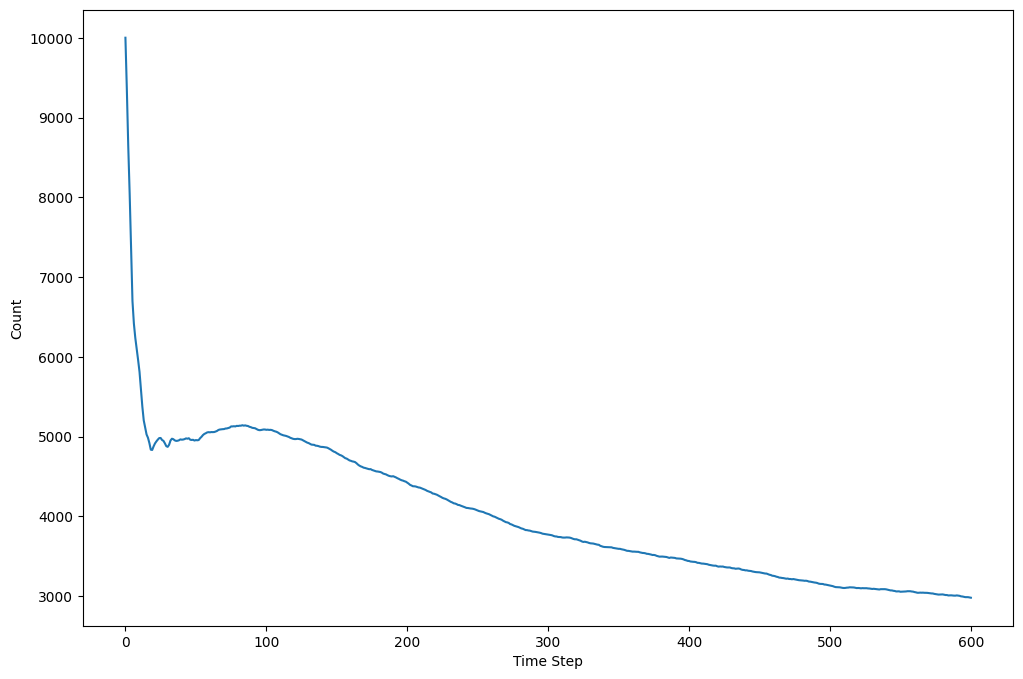

In [473]:
df["office15_0_246_aout"].plot(figsize=(12,8))
plt.xlabel('Time Step')
plt.ylabel('Count')
plt.show()

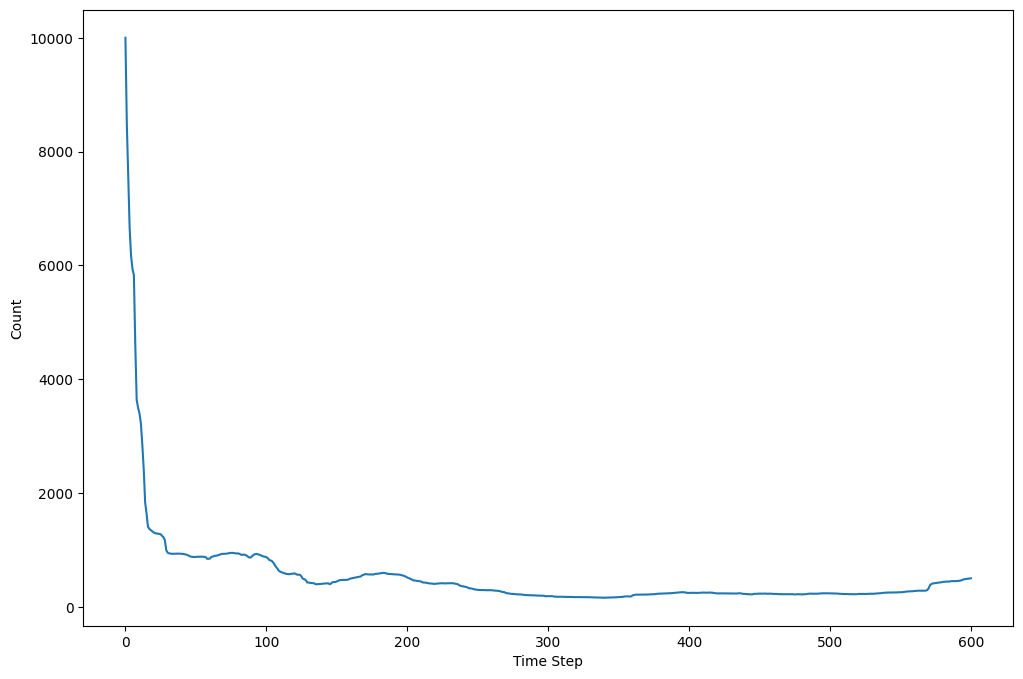

In [474]:
df["office10_660_0"].plot(figsize=(12,8))
plt.xlabel('Time Step')
plt.ylabel('Count')
plt.show()

0      10000
1       9324
2       8412
3       7366
4       6877
       ...  
596     5109
597     5116
598     5122
599     5111
600     5106
Name: 0_246_aout_B, Length: 601, dtype: int64
5130.118136439268


<AxesSubplot:>

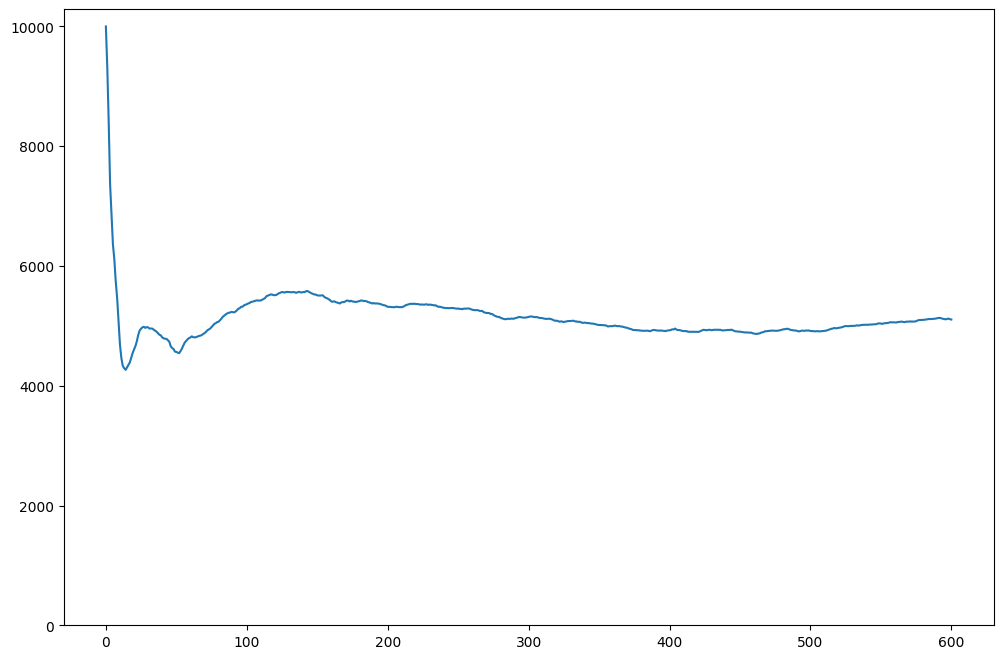

In [480]:
df_t = pd.read_csv("/mnt/MachineLearning/Count_timeSeries/onlyFloating/transpose/office15.csv")
maxID = df_t.mean().argmax()
print(df_t.iloc[:, maxID])
print(df_t.iloc[:, maxID].mean())
df_t.iloc[:, maxID].plot(ylim=(0,None), figsize=(12,8))

0      10000
1       9737
2       9126
3       8930
4       8200
       ...  
596      197
597      199
598      199
599      209
600      210
Name: 660_0_D, Length: 601, dtype: int64
222.5440931780366


<AxesSubplot:>

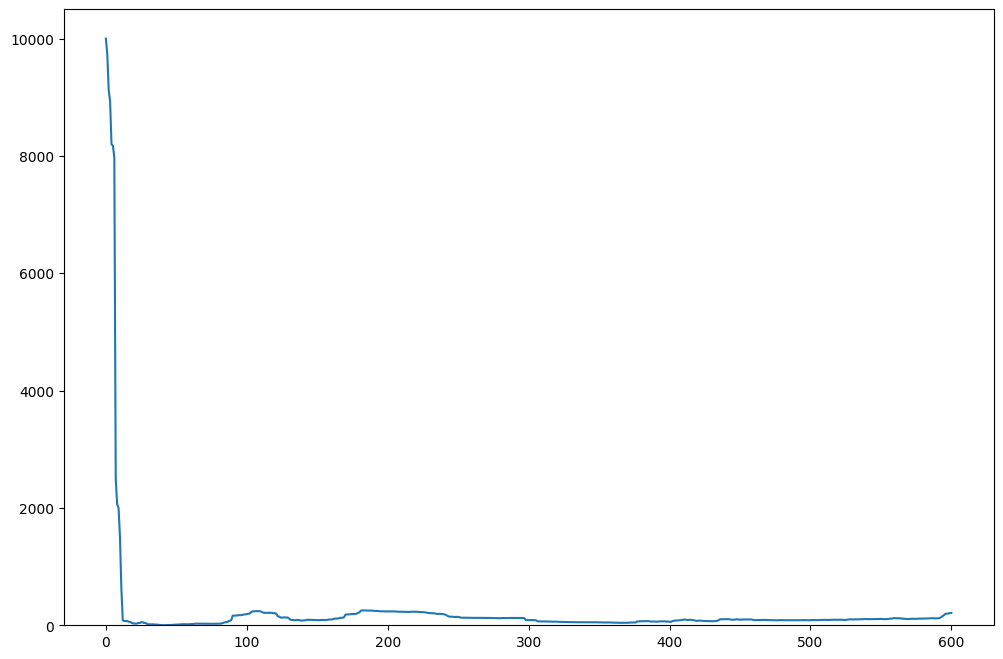

In [481]:
df_t = pd.read_csv("/mnt/MachineLearning/Count_timeSeries/onlyFloating/transpose/office10.csv")
minID = df_t.mean().argmin()
print(df_t.iloc[:, minID])
print(df_t.iloc[:, minID].mean())
df_t.iloc[:, minID].plot(ylim=(0,None), figsize=(12,8))

# Data Addition (2023/1/12)

In [491]:
df_read = pd.read_csv("/mnt/MachineLearning/Count_timeSeries/onlyFloating/patientMean/summary.csv")
df_read.mean()

office10_0_0            2231.157404
office10_0_164_aout     2887.997005
office10_0_164_bout     2255.559401
office10_0_246_aout     2742.974709
office10_0_246_bout     3163.877537
                           ...     
office9_960_164_bout    1761.155408
office9_960_246_aout    2089.236606
office9_960_246_bout    2164.490183
office9_960_82_aout     1956.033278
office9_960_82_bout     2089.557072
Length: 907, dtype: float64

<AxesSubplot:>

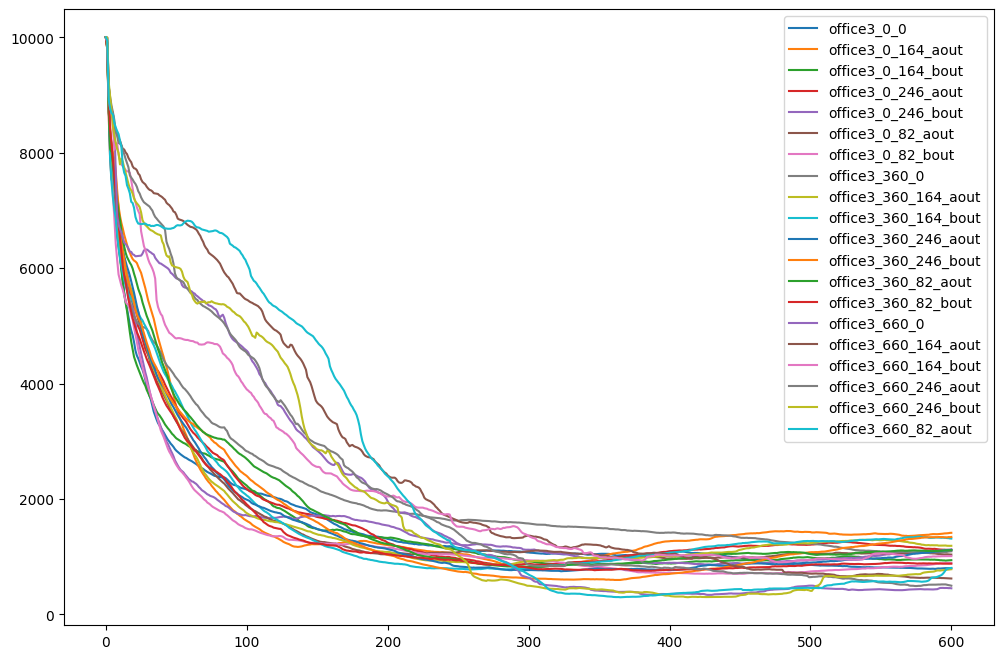

In [492]:
df_filtered = df_read.filter(like="office3_")
df_filtered.iloc[:,:20].plot(figsize=(12,8))

In [493]:
s_mean = df_read.iloc[1:].mean()
s_mean.rename("countTimeMean_onlyFloating", inplace=True)

office10_0_0            2218.209333
office10_0_164_aout     2876.143667
office10_0_164_bout     2242.652000
office10_0_246_aout     2730.879667
office10_0_246_bout     3152.484000
                           ...     
office9_960_164_bout    1747.424000
office9_960_246_aout    2076.052000
office9_960_246_bout    2151.431000
office9_960_82_aout     1942.626667
office9_960_82_bout     2076.373000
Name: countTimeMean_onlyFloating, Length: 907, dtype: float64

In [498]:
df_new = pd.DataFrame(s_mean)
df_new

,countTimeMean_onlyFloating
office10_0_0,2218.209333
office10_0_164_aout,2876.143667
office10_0_164_bout,2242.652000
office10_0_246_aout,2730.879667
office10_0_246_bout,3152.484000
...,...
office9_960_164_bout,1747.424000
office9_960_246_aout,2076.052000
office9_960_246_bout,2151.431000
office9_960_82_aout,1942.626667


In [499]:
def get_val_from_casename(casename:str, index:int):
    return float(casename.split("_")[index])

print(get_val_from_casename("office2_0_164_aout", 2))

164.0


In [500]:
def get_exhaust_from_casename(casename:str):
    s_split = casename.split("_")
    if len(s_split) == 4:
        exhaust_str = s_split[3]
        if exhaust_str == "aout":
            exhaust = "a"
        elif exhaust_str == "bout":
            exhaust = "b"
    else:
        exhaust = "off"
        
    return exhaust

print(get_exhaust_from_casename("office2_0_164"))

off


In [506]:
def add_airConditions(df:pd.DataFrame):
    df["aircon"] = df["case_name"].apply(get_val_from_casename, args=(1,))
    df["ventilation"] = df["case_name"].apply(get_val_from_casename, args=(2,))
    df["exhaust"] = df["case_name"].apply(get_exhaust_from_casename)

    return df

In [505]:
df_new.reset_index().rename(columns={'index':'case_name'})

,case_name,countTimeMean_onlyFloating
0,office10_0_0,2218.209333
1,office10_0_164_aout,2876.143667
2,office10_0_164_bout,2242.652000
3,office10_0_246_aout,2730.879667
4,office10_0_246_bout,3152.484000
...,...,...
902,office9_960_164_bout,1747.424000
903,office9_960_246_aout,2076.052000
904,office9_960_246_bout,2151.431000
905,office9_960_82_aout,1942.626667


In [509]:
df1 = add_airConditions(df_new.reset_index().rename(columns={'index':'case_name'}))
df1

,case_name,countTimeMean_onlyFloating,aircon,ventilation,exhaust
0,office10_0_0,2218.209333,0.0,0.0,off
1,office10_0_164_aout,2876.143667,0.0,164.0,a
2,office10_0_164_bout,2242.652000,0.0,164.0,b
3,office10_0_246_aout,2730.879667,0.0,246.0,a
4,office10_0_246_bout,3152.484000,0.0,246.0,b
...,...,...,...,...,...
902,office9_960_164_bout,1747.424000,960.0,164.0,b
903,office9_960_246_aout,2076.052000,960.0,246.0,a
904,office9_960_246_bout,2151.431000,960.0,246.0,b
905,office9_960_82_aout,1942.626667,960.0,82.0,a


In [513]:
df1["office"] = df1["case_name"].apply(lambda case_name: case_name.split("_")[0])

In [516]:
df_summary = df1[["case_name", "office", "aircon", "ventilation", "exhaust", "countTimeMean_onlyFloating"]]
df_summary

,case_name,office,aircon,ventilation,exhaust,countTimeMean_onlyFloating
0,office10_0_0,office10,0.0,0.0,off,2218.209333
1,office10_0_164_aout,office10,0.0,164.0,a,2876.143667
2,office10_0_164_bout,office10,0.0,164.0,b,2242.652000
3,office10_0_246_aout,office10,0.0,246.0,a,2730.879667
4,office10_0_246_bout,office10,0.0,246.0,b,3152.484000
...,...,...,...,...,...,...
902,office9_960_164_bout,office9,960.0,164.0,b,1747.424000
903,office9_960_246_aout,office9,960.0,246.0,a,2076.052000
904,office9_960_246_bout,office9,960.0,246.0,b,2151.431000
905,office9_960_82_aout,office9,960.0,82.0,a,1942.626667


In [519]:
from data_test import test_DataFrame

# DataFrame内で、ケース名と説明変数の間に齟齬がないかをテスト
test_DataFrame(df_summary)

In [552]:
# Sort DataFrame

def sort_DataFrame(df:pd.DataFrame):
    office_sorted_list = [f"office{i+1}" for i in range(33)]
    print(office_sorted_list)
    
    index_ser = df['office'].apply(
        lambda office: office_sorted_list.index(office)
    )

    df = df.assign(order = index_ser)
    
    return df.sort_values(['order', 'case_name']).drop(columns="order").reset_index(drop=True)

In [553]:
df_summary = sort_DataFrame(df_summary)
df_summary

['office1', 'office2', 'office3', 'office4', 'office5', 'office6', 'office7', 'office8', 'office9', 'office10', 'office11', 'office12', 'office13', 'office14', 'office15', 'office16', 'office17', 'office18', 'office19', 'office20', 'office21', 'office22', 'office23', 'office24', 'office25', 'office26', 'office27', 'office28', 'office29', 'office30', 'office31', 'office32', 'office33']


,case_name,office,aircon,ventilation,exhaust,countTimeMean_onlyFloating
0,office1_0_0,office1,0.0,0.0,off,2991.405667
1,office1_0_123_aout,office1,0.0,123.0,a,2656.982333
2,office1_0_123_bout,office1,0.0,123.0,b,2951.144667
3,office1_0_164_aout,office1,0.0,164.0,a,2470.395667
4,office1_0_164_bout,office1,0.0,164.0,b,3271.053000
...,...,...,...,...,...,...
902,office33_960_164_bout,office33,960.0,164.0,b,2504.354667
903,office33_960_246_aout,office33,960.0,246.0,a,1331.682000
904,office33_960_246_bout,office33,960.0,246.0,b,1495.644000
905,office33_960_82_aout,office33,960.0,82.0,a,2227.621000


In [554]:
df_summary.iloc[df_summary["countTimeMean_onlyFloating"].argmax()]

case_name                     office15_0_246_aout
office                                   office15
aircon                                        0.0
ventilation                                 246.0
exhaust                                         a
countTimeMean_onlyFloating               4004.831
Name: 406, dtype: object

In [555]:
df_summary.iloc[df_summary["countTimeMean_onlyFloating"].argmin()]

case_name                     office10_660_0
office                              office10
aircon                                 660.0
ventilation                              0.0
exhaust                                  off
countTimeMean_onlyFloating        513.951333
Name: 277, dtype: object

In [558]:
df_summary.to_csv("/mnt/MachineLearning/data/summary_20230112.csv", index=False)

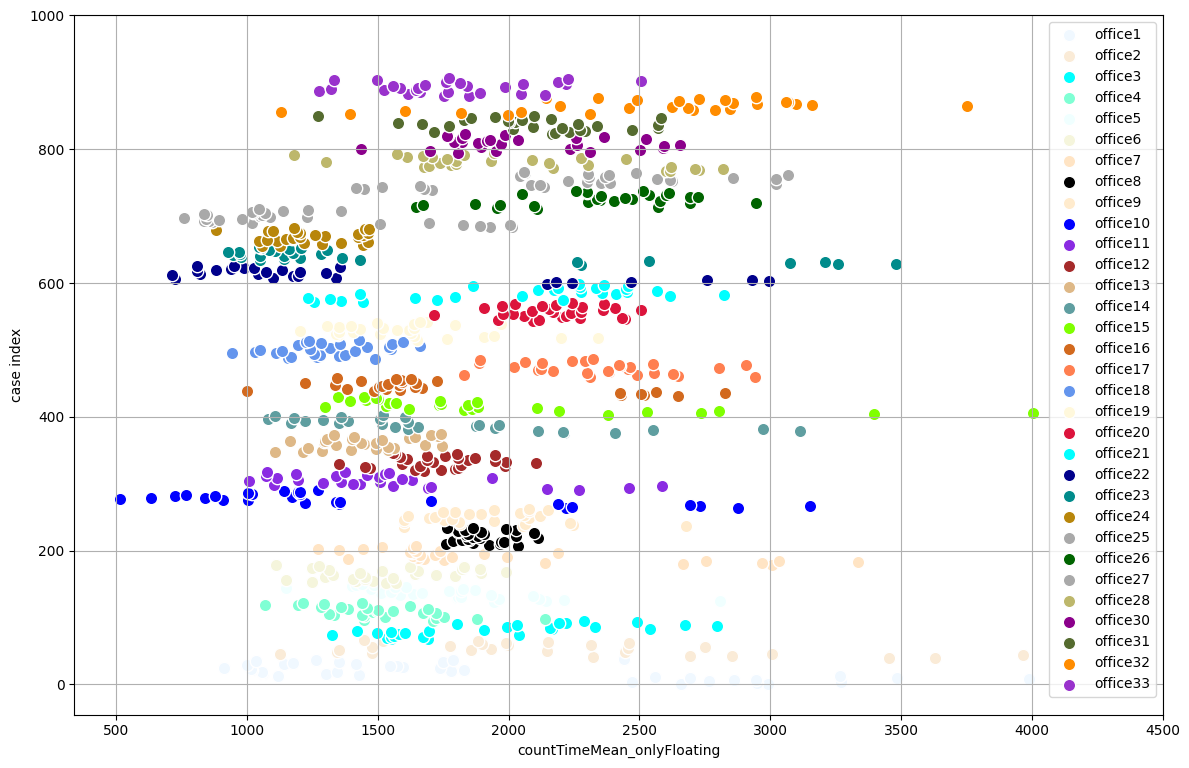

In [557]:
data_plot_overCases(df_summary, "countTimeMean_onlyFloating", x_lim=(None,4500), y_lim=(None,1000))

In [579]:
df_summary["countTimeMean_onlyFloating"].describe()

count     907.000000
mean     1820.215402
std       564.993977
min       513.951333
25%      1413.353667
50%      1748.890667
75%      2184.599500
max      4004.831000
Name: countTimeMean_onlyFloating, dtype: float64

In [575]:
# ４分位数でビニング
# df_summary["countTimeMean_bin"] = pd.qcut(df_summary["countTimeMean_onlyFloating"], 4, labels=False)
# df_summary["countTimeMean_bin"] = pd.qcut(df_summary["countTimeMean_sit2stand"], 4, labels=False)

# 最大最小区間を等間隔にビニング
df_summary["countTimeMean_bin"] = pd.cut(df_summary["countTimeMean_onlyFloating"], 3, labels=False)

df_summary

,case_name,office,aircon,ventilation,exhaust,countTimeMean_onlyFloating,countTimeMean_bin
0,office1_0_0,office1,0.0,0.0,off,2991.405667,2
1,office1_0_123_aout,office1,0.0,123.0,a,2656.982333,1
2,office1_0_123_bout,office1,0.0,123.0,b,2951.144667,2
3,office1_0_164_aout,office1,0.0,164.0,a,2470.395667,1
4,office1_0_164_bout,office1,0.0,164.0,b,3271.053000,2
...,...,...,...,...,...,...,...
902,office33_960_164_bout,office33,960.0,164.0,b,2504.354667,1
903,office33_960_246_aout,office33,960.0,246.0,a,1331.682000,0
904,office33_960_246_bout,office33,960.0,246.0,b,1495.644000,0
905,office33_960_82_aout,office33,960.0,82.0,a,2227.621000,1


In [578]:
df_summary["countTimeMean_bin"].value_counts(sort=False)

2     45
1    450
0    412
Name: countTimeMean_bin, dtype: int64

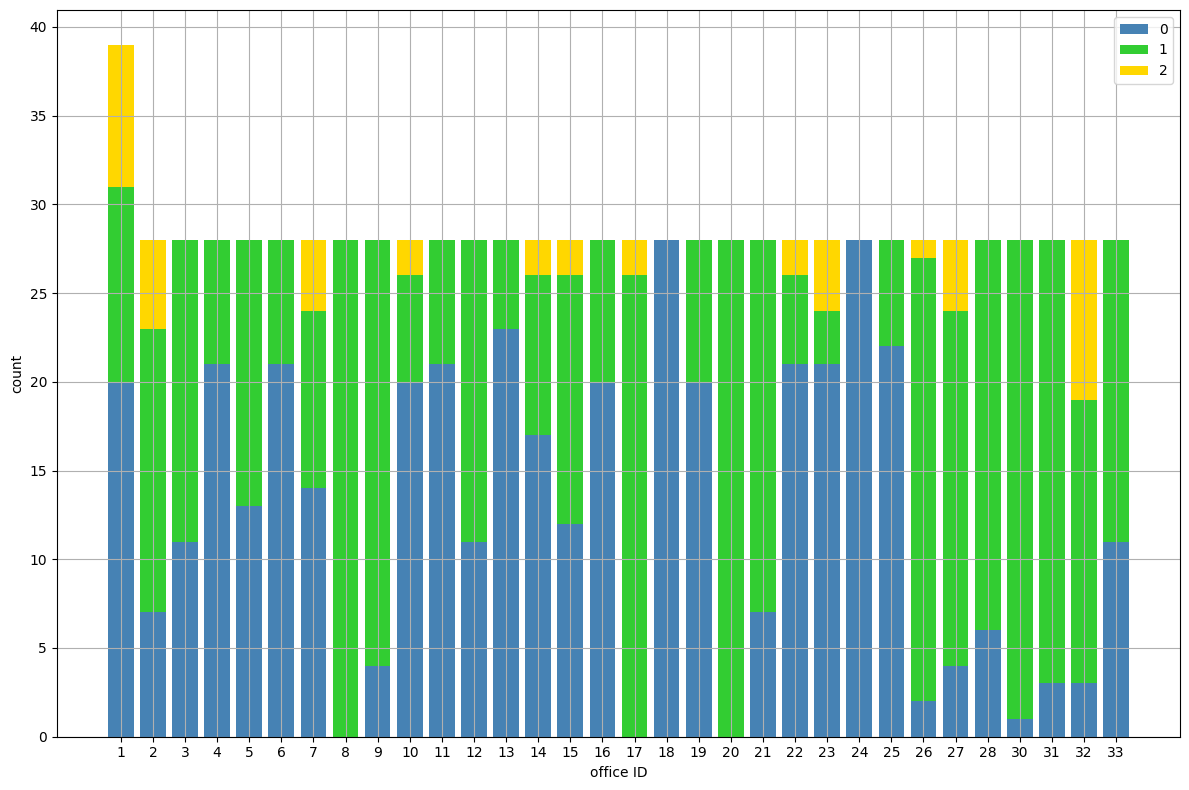

In [577]:
plot_RoI_level(df_summary)

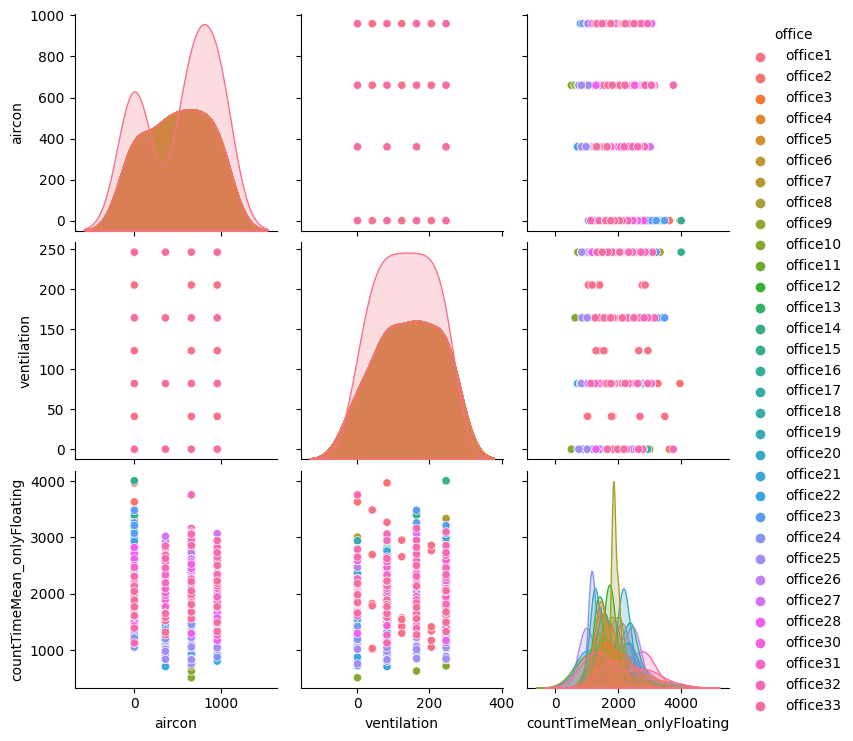

In [565]:
import seaborn as sns

sns.pairplot(df_summary[["aircon", "ventilation", "countTimeMean_onlyFloating",  "office"]], hue='office')#, diag_kind="hist")

In [566]:
df_corr = df_summary[["aircon", "ventilation", "countTimeMean_onlyFloating"]].corr()
df_corr

,aircon,ventilation,countTimeMean_onlyFloating
aircon,1.000000,-0.000498,-0.267003
ventilation,-0.000498,1.000000,0.046309
countTimeMean_onlyFloating,-0.267003,0.046309,1.000000


<AxesSubplot:>

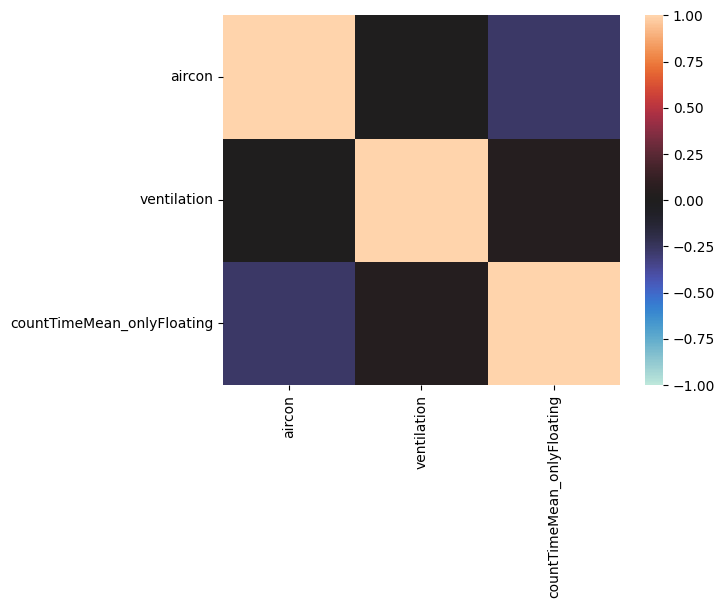

In [567]:
sns.heatmap(df_corr, vmax=1, vmin=-1, center=0)

# PointCloud Test

In [580]:
# 点群データNPYファイルへのパス
pcFilePath = '/mnt/MachineLearning/Office3DModel/PointCloud_sampled/PointCloud_dict_test.npy'

In [581]:
import numpy as np

a = np.load(pcFilePath, allow_pickle='TRUE')    # 0-D Array で返ってくる
pointCloud_dict = a.item()    # 0-D Array をひとつのオブジェクトに変換
pointCloud_dict

{'office1': array([[2.5     , 2.25    , 2.6     ],
        [2.5     , 2.375   , 2.6     ],
        [2.5     , 2.45    , 2.6     ],
        ...,
        [3.825   , 1.733333, 0.7     ],
        [0.925   , 2.875   , 0.05    ],
        [1.495   , 1.278333, 0.53    ]], dtype=float32),
 'office10': array([[3.      , 2.5     , 2.6     ],
        [3.      , 2.625   , 2.6     ],
        [3.      , 2.7     , 2.6     ],
        ...,
        [3.9725  , 2.275   , 0.7     ],
        [3.065   , 4.078333, 0.48    ],
        [1.485   , 2.533333, 0.7     ]], dtype=float32),
 'office11': array([[3.       , 2.5      , 2.6      ],
        [3.       , 2.625    , 2.6      ],
        [3.       , 2.7      , 2.6      ],
        ...,
        [3.96     , 4.305    , 0.53     ],
        [3.45     , 3.183333 , 0.75     ],
        [2.7      , 5.1      , 0.2833333]], dtype=float32),
 'office12': array([[3.      , 2.5     , 2.6     ],
        [3.      , 2.625   , 2.6     ],
        [3.      , 2.7     , 2.6     ],
     

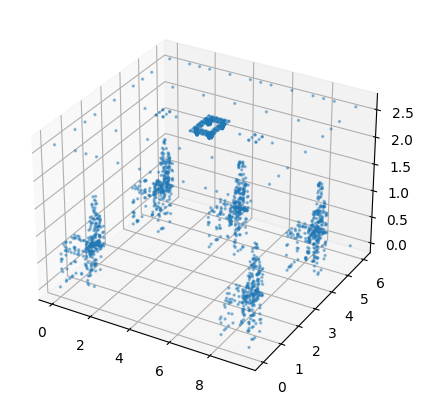

In [582]:
from matplotlib import pyplot as plt

def plot3d_points(point_cloud):
    """
    点群データ（２次元配列）をプロット
    """
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(projection="3d")
    ax.scatter(point_cloud[:, 0], point_cloud[:, 1], point_cloud[:, 2], alpha=0.4, s=2)
    # ax.set_axis_off()
    plt.show()
    
plot3d_points(pointCloud_dict['office33'])